# Visualization

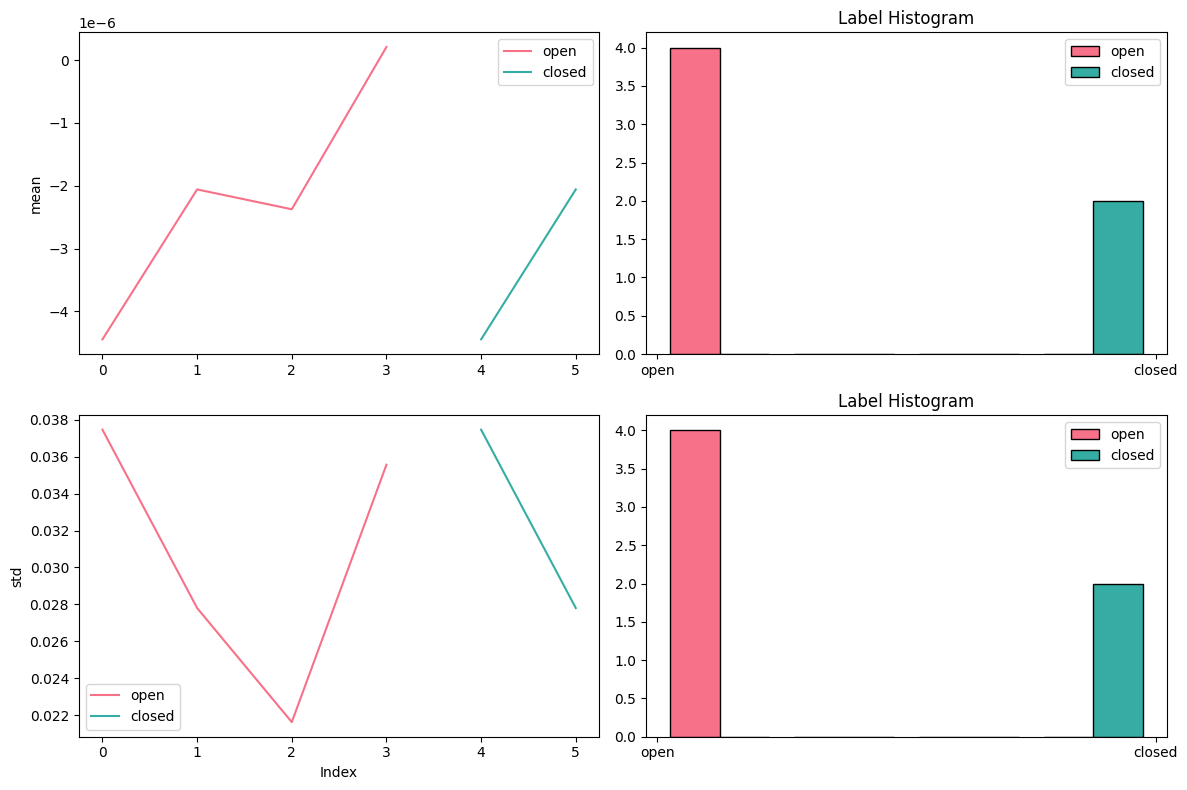

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df = pd.read_csv("training_data.csv")

# Assuming 'label' is the label column
labels = df['label']

# Extracting features (excluding the label column)
features = df.drop(columns=['label'])

# Get unique labels and assign colors
unique_labels = labels.unique()
label_colors = sns.color_palette("husl", len(unique_labels))

# Plot each feature in a separate graph
num_features = len(features.columns)

# Set up subplots for features
fig, axes = plt.subplots(num_features, 2, figsize=(12, 4 * num_features))

# Iterate through features
for i, feature in enumerate(features.columns):
    # Plot feature as line with different colors for each label
    for label, color in zip(unique_labels, label_colors):
        subset = df[df['label'] == label]
        axes[i, 0].plot(subset.index, subset[feature], label=f'{label}', color=color)

    axes[i, 0].set_ylabel(feature)
    axes[i, 0].legend()

    # Plot histogram for labels with different colors
    axes[i, 1].hist([labels[labels == label] for label in unique_labels], bins='auto', edgecolor='black', label=unique_labels, color=label_colors)
    axes[i, 1].set_title('Label Histogram')
    axes[i, 1].legend()

# Add a common X-axis label for features
axes[-1, 0].set_xlabel('Index')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


# Imports

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
import glob
from scipy import signal
import seaborn as sn
from sklearn.metrics import classification_report
import joblib

# Reading Data

In [ ]:
# Load your CSV file
df = pd.read_csv("training_data.csv")

x_df = df.iloc[:, :2]
y_df = df.iloc[:, 2:]

x_data=x_df.values
y_data=y_df.values

print(x_data.shape)
print(y_data.shape)

In [ ]:
Xsc = StandardScaler().fit_transform(x_data)
Xsc=pd.DataFrame(Xsc)
y=pd.DataFrame(y_data)
Xsc.head()

# Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, test_size = 0.2, random_state = 0)


svc=SVC(class_weight='balanced') 
            
# Fit classifier to training set
svc.fit(X_train, y_train)

# Make predictions on test set - unseen daa
y_pred = svc.predict(X_test)

print(f'y predict = {y_pred}')
print(f'y test = {y_test}')

print(f'Accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# Results

In [ ]:
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix for Seizure Dataset')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')
plt.show()

print(classification_report(y_test, y_pred))

# Saving the Model

In [ ]:
joblib.dump(svc, 'svm_model.pkl')